In [1]:
setwd("/home/victor/OneDrive/Online Courses/MITx 15.071x The Analytics Edge")

In [2]:
emails = read.csv("Unit5_1/Unit5_1/emails.csv", stringsAsFactors = FALSE)
str(emails)

'data.frame':	5728 obs. of  2 variables:
 $ text: chr  "Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market"| __truncated__ "Subject: the stock trading gunslinger  fanny is merrill but muzo not colza attainder and penultimate like esmar"| __truncated__ "Subject: unbelievable new homes made easy  im wanting to show you this  homeowner  you have been pre - approved"| __truncated__ "Subject: 4 color printing special  request additional information now ! click here  click here for a printable "| __truncated__ ...
 $ spam: int  1 1 1 1 1 1 1 1 1 1 ...


In [3]:
table(emails$spam)


   0    1 
4360 1368 

In [4]:
emails$text[1]

[1] "Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  marketing break - through shouldn ' t make gaps in your budget . 100 % satisfaction  guaranteed : we provide unlimited amount of changes with no extra fees for you to  be surethat you will love the result of this collaboration . have a look at our  portfolio _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ not interested . . . _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _"

In [5]:
max(nchar(emails$text))

[1] 43952

In [6]:
which.min(nchar(emails$text))

[1] 1992

In [7]:
library(tm)

Loading required package: NLP


In [8]:
corpus = Corpus(VectorSource(emails$text))
corpus = tm_map(corpus, tolower)
corpus = tm_map(corpus, removePunctuation)
corpus = tm_map(corpus, removeWords, stopwords("english"))
corpus = tm_map(corpus, stemDocument)
dtm = DocumentTermMatrix(corpus)

Warning message in tm_map.SimpleCorpus(corpus, tolower):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(corpus, removePunctuation):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(corpus, removeWords, stopwords("english")):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(corpus, stemDocument):
“transformation drops documents”

In [11]:
dtm

<<DocumentTermMatrix (documents: 5728, terms: 28687)>>
Non-/sparse entries: 481719/163837417
Sparsity           : 100%
Maximal term length: 24
Weighting          : term frequency (tf)

In [12]:
spdtm = removeSparseTerms(dtm, 0.95)

In [13]:
spdtm

<<DocumentTermMatrix (documents: 5728, terms: 330)>>
Non-/sparse entries: 213551/1676689
Sparsity           : 89%
Maximal term length: 10
Weighting          : term frequency (tf)

In [28]:
emailsSparse = as.data.frame(as.matrix(spdtm))
colnames(emailsSparse) = make.names(colnames(emailsSparse))

In [29]:
sort(colSums(emailsSparse))

vkamin      begin     either       done      sorri        lot    mention 
       301        317        318        337        343        348        355 
   thought      bring       idea     better     immedi    without       mean 
       367        374        378        383        385        389        390 
     write      happi      repli       life     involv     experi     specif 
       390        396        397        400        405        405        407 
    arrang      creat       read       wish       open     realli       link 
       410        413        413        414        416        417        421 
       say    respond      sever       keep        etc      anoth        run 
       423        430        430        431        434        435        437 
      info     togeth      short     sincer        buy        due    alreadi 
       438        438        439        441        442        445        446 
      line      allow    special     recent      given     believ     design 
       448        450        451        451        453        456        457 
       put      remov       X853  wednesday       type     public       full 
       458        460        462        464        466        468        469 
      hear       join     effect     effort    tuesday     robert      locat 
       469        469        471        473        474        482        485 
     check       area      final    increas       soon    analysi       sure 
       488        489        490        491        492        495        495 
      deal     return      place      onlin    success understand       sinc 
       498        509        516        518        519        521        521 
     still     import    comment    confirm      hello       long      thing 
       523        530        531        532        534        534        535 
     point    appreci       feel     member      howev       hour        net 
       536        541        543        545        545        548        548 
   continu      event     expect       unit    suggest    resourc       case 
       552        552        554        554        554        556        561 
   version     corpor     applic      engin       part     attend   thursday 
       564        565        567        571        571        573        575 
     might       morn        abl     assist     differ     intern      updat 
       577        586        590        598        598        606        606 
      move       mark     depart       even       made   internet       high 
       612        613        621        622        622        623        624 
     cours   contract     gibner        end      right        per      invit 
       626        629        633        635        639        642        647 
    approv       real     monday     result     school      kevin     direct 
       648        648        649        655        655        656        657 
      home        tri     detail       form    problem        web        doc 
       660        661        661        664        666        668        675 
       don      deriv      april       note      relat     websit       juli 
       676        676        682        688        694        700        701 
  director    complet       rate       valu      futur    student        set 
       705        707        717        721        722        726        727 
    within     requir    softwar       book       mani     person      click 
       732        736        739        756        758        767        769 
      file      addit      money     associ   particip       term     access 
       770        774        776        777        782        786        789 
    custom    possibl       copi       oper       cost    respons      today 
       796        796        797        820        821        824        828 
   account      great       base       dear     london    support     friday 
       829        837     

In [31]:
emailsSparse$spam = emails$spam

In [32]:
emailsSparseHam = subset(emailsSparse, spam == 0)

In [33]:
sort(colSums(emailsSparseHam))

spam       life      remov      money      onlin    without     websit 
         0         80        103        114        173        191        194 
     click    special       wish      repli        buy        net       link 
       217        226        229        239        243        243        247 
    immedi       done       mean     design        lot     effect       info 
       249        254        259        261        268        270        273 
      read     either      write       line      begin    success      sorri 
       279        279        286        289        291        293        293 
    involv    softwar      creat     better     vkamin        say       keep 
       294        299        299        301        301        305        306 
     bring     believ       full    increas     realli    mention    thought 
       311        313        317        320        324        325        325 
    invest       idea      secur     specif      sever     experi      thing 
       327        327        337        338        340        346        347 
     allow        due      check       type      happi     return     expect 
       348        351        351        352        354        355        356 
     short     effort       open   internet     sincer     public     recent 
       357        358        360        361        361        364        368 
     anoth    alreadi       home       made    respond      given        etc 
       369        372        375        380        382        383        385 
       put     within      place    version      right      hello       sure 
       385        386        388        390        390        395        396 
      area        run     arrang    account       join       hour      locat 
       397        398        399        401        403        404        406 
    togeth     import      engin        per     corpor       high     result 
       406        411        411        412        414        416        418 
      hear      final       deal     applic       even        web     custom 
       420        422        423        428        429        430        433 
      soon       long       sinc      futur     member      event       X000 
       435        436        439        440        446        447        447 
       don       part       feel    tuesday  wednesday       unit      still 
       450        450        453        454        456        457        457 
      site       X853    continu understand    resourc     robert       form 
       458        461        464        464        466        466        468 
   analysi      point     assist    confirm     differ     intern      might 
       468        474        475        485        489        489        490 
      real       case      howev    comment    complet        abl       rate 
       490        492        496        505        515        515        516 
   appreci        tri       move      updat     approv    suggest       free 
       518        521        526        527        533        533        535 
  contract     detail       morn        end       mani     attend   thursday 
       544        546        546        550        550        558        558 
    direct     requir      cours     person      relat     depart      today 
       561        562        567        569        573        575        577 
     start        way       mark       valu    problem      peopl       note 
       580        586        588        590        593        599        600 
    school      invit     access       term       juli     monday     gibner 
       607        614        617        625        630        630        633 
      base   director      offer       cost      addit      kevin      great 
       635        640        643        646        648        654        655 
       set       file       find       much      order       oper      deriv 
       658        659       

In [34]:
emailsSparseSpam = subset(emailsSparse, spam == 1)

In [35]:
sort(colSums(emailsSparseSpam))

enron   kaminski       X713   crenshaw     vkamin     gibner    stinson 
         0          0          0          0          0          0          0 
      vinc       X853      kevin        doc    shirley      deriv    houston 
         1          1          2          2          2          3          5 
     april      resum        edu     friday  wednesday        hou        ect 
         5          5          7          7          8          8         10 
    arrang  interview     london     attend     robert    student    schedul 
        11         13         15         15         16         16         17 
  thursday     monday       john    tuesday     attach    suggest    appreci 
        17         19         20         20         21         21         23 
      mark    comment      begin    analysi      X2001      model    mention 
        25         26         26         27         29         29         30 
      hope      X2000     togeth      invit     confer    univers     financ 
        30         32         32         33         33         34         35 
      talk     either        run      shall       morn      happi    thought 
        38         39         39         40         40         42         42 
    depart    confirm    respond     school       hear       corp        etc 
        46         47         48         48         49         49         49 
     howev      sorri       idea     energi    discuss       open     option 
        49         50         51         55         56         56         56 
understand       soon     experi      cours     associ      point      bring 
        57         57         59         59         62         62         63 
  director   particip       join      anoth      still   research      final 
        65         65         66         66         66         68         68 
       set     specif       case      given       juli    problem        put 
        69         69         69         70         71         73         73 
       ask    alreadi        fax        abl       deal       team       book 
        74         74         75         75         75         76         76 
     locat       issu       meet      updat        lot     sincer      short 
        79         79         79         79         80         80         82 
    better       sinc       done     recent   question    possibl        end 
        82         82         83         83         83         84         85 
  contract       move      might       data    continu       note    resourc 
        85         86         87         87         88         88         90 
     sever       feel       area   communic     realli        due     origin 
        90         90         92         92         93         94         96 
    direct       unit       copi       long     member       sure      allow 
        96         97         97         98         99         99        102 
      dear      write     public      event        let     differ       file 
       104        104        104        105        107        109        111 
    involv    respons      creat       type     effort     approv     detail 
       111        113        114        114        115        115        115 
   request     intern        say     import    support      relat       part 
       117        117        118        119        120        121        121 
    assist        two       last       back       keep      addit       date 
       123        124        124        125        125        126        127 
     place      group       mean       valu      think      offic       read 
       128        130        131        131        132        133        134 
    immedi      check      hello     applic        tri     review      phone 
       136        137        139        139        140        142        143 
    believ       hour      power    present    process     corpor       oper 
       143        144      

In [37]:
emailsSparse$spam = as.factor(emailsSparse$spam)

In [38]:
library(caTools)

In [130]:
set.seed(123)
spl = sample.split(emailsSparse$spam, 0.7)
train = subset(emailsSparse, spl == TRUE)
test = subset(emailsSparse, spl == FALSE)

In [131]:
spamLog = glm(spam ~ ., data = train, family = "binomial")

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

In [132]:
library(rpart)
library(rpart.plot)

In [133]:
spamCART = rpart(spam ~ ., data = train, method = "class")

In [134]:
library(randomForest)

In [135]:
set.seed(123)
spamRF = randomForest(spam ~. , data = train)

In [136]:
predTrainLog = predict(spamLog, type = "response")
sort(predTrainLog)

19           28           45           47           60           70 
2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 
          72          112          116          120          123          131 
2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 
         140          141          142          149          201          205 
2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 
         211          227          239          253          265          288 
2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 
         299          310          325          338          365          368 
2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 
         372          385          409          413          418          427 
2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 
         473          539          569          587          668          691 
2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 
         709          730          733          827          844          851 
2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 
         874          883          893          899          920          934 
2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 
         970          984         1033         1068         1082         1090 
2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 
        1113         1122         1126         1164         1175         1213 
2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 
        1222         1230         1247         1257         1276         1281 
2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 
        1295         1314         1324         1334         1349         1369 
2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 
        1370         1371         1372         1373         1374         1375 
2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 
        1377         1379         1380         1381         1382         1384 
2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 
        1386         1387         1389         1390         1392         1393 
2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 
        1394         1395         1397         1398         1399         1400 
2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 
        1401         1402         1403         1404         1405         1407 
2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 
        1409         1413         1414         1415         1417         1418 
2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 
        1420         1422         1423         1425         1426         1427 
2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 
        1430         1432         1435         1436         1437         1439 
2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 
        1440         1441         1442         1443         1444         1447 
2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 
        1448         1449         1450         1451         1454         1455 
2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 
        1457         1460         1464         1465         1468         1469 
2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 
        1470         1472         1474         1475         1477         1482 
2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 
        1486         1488         1489         1491         

In [137]:
table(predTrainLog < 0.00001)


FALSE  TRUE 
  894  3116 

In [138]:
table(predTrainLog > 0.99999)


FALSE  TRUE 
 3116   894 

In [139]:
table(predTrainLog >= 0.00001 & predTrainLog <= 0.99999)


FALSE 
 4010 

In [140]:
summary(spamLog)


Call:
glm(formula = spam ~ ., family = "binomial", data = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
 -8.49    0.00    0.00    0.00    8.49  

Coefficients:
               Estimate Std. Error    z value Pr(>|z|)    
(Intercept)  -1.051e+15  8.603e+06 -122169686   <2e-16 ***
busi         -5.094e+13  1.361e+06  -37419364   <2e-16 ***
chang        -1.767e+14  2.203e+06  -80225100   <2e-16 ***
compani       9.616e+13  1.262e+06   76211884   <2e-16 ***
corpor       -5.948e+13  2.915e+06  -20405136   <2e-16 ***
day          -1.241e+14  1.666e+06  -74532038   <2e-16 ***
done          1.002e+14  4.823e+06   20772891   <2e-16 ***
effect        1.553e+14  4.154e+06   37396284   <2e-16 ***
effort       -1.840e+13  3.379e+06   -5447206   <2e-16 ***
even         -1.392e+14  3.257e+06  -42739555   <2e-16 ***
full          1.890e+14  3.658e+06   51685838   <2e-16 ***
good          1.134e+14  2.709e+06   41845851   <2e-16 ***
inform        1.220e+14  1.479e+06   82522854   

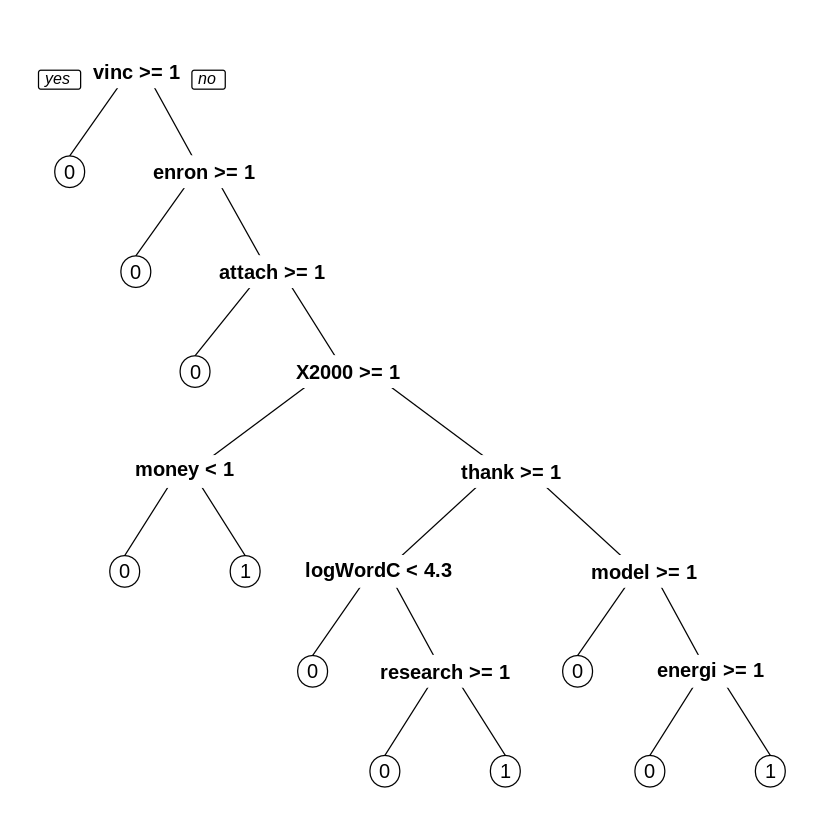

In [141]:
prp(spamCART)

In [142]:
predTrainLog = predict(spamLog,type = "response")
table(train$spam, predTrainLog >= 0.5)

   
    FALSE TRUE
  0  3039   13
  1    77  881

In [143]:
accLogTrain = (3052 + 954)/nrow(train)
accLogTrain

[1] 0.9990025

In [144]:
library(ROCR)

In [145]:
ROCRpredTrainLog = prediction(predTrainLog, train$spam)
auc = as.numeric(performance(ROCRpredTrainLog, "auc")@y.values)
auc

[1] 0.9576824

In [146]:
predTrainCART = predict(spamCART)
table(train$spam , predTrainCART[,2]>= 0.5)

   
    FALSE TRUE
  0  2875  177
  1    56  902

In [147]:
accCARTTrain = (2885 + 894)/nrow(train)
accCARTTrain

[1] 0.942394

In [148]:
ROCRpredTrainCART = prediction(predTrainCART[,2], train$spam)
auc = as.numeric(performance(ROCRpredTrainCART, "auc")@y.values)
auc

[1] 0.9671039

In [149]:
predTrainRF = predict(spamRF)
table(train$spam, predTrainRF)

   predTrainRF
       0    1
  0 3022   30
  1   45  913

In [150]:
accRFTrain = (3017 + 916)/nrow(train)
accRFTrain

[1] 0.980798

In [151]:
predTrainRFprob = predict(spamRF, type = "prob")
ROCRpredTrainRF = prediction(predTrainRFprob[,2], train$spam)
auc = as.numeric(performance(ROCRpredTrainRF, "auc")@y.values)
auc

[1] 0.9975168

In [152]:
predTestLog = predict(spamLog,type = "response", newdata = test)
table(test$spam, predTestLog >= 0.5)

   
    FALSE TRUE
  0  1263   45
  1    64  346

In [153]:
accLogTest = (1257 + 376)/nrow(test)
accLogTest

[1] 0.9505239

In [154]:
ROCRpredTestLog = prediction(predTestLog, test$spam)
auc = as.numeric(performance(ROCRpredTestLog, "auc")@y.values)
auc

[1] 0.9047494

In [155]:
predTestCART = predict(spamCART, newdata = test)
table(test$spam , predTestCART[,2]>= 0.5)

   
    FALSE TRUE
  0  1214   94
  1    26  384

In [156]:
accCARTTest = (1228 + 386)/nrow(test)
accCARTTest

[1] 0.9394645

In [157]:
ROCRpredTestCART = prediction(predTestCART[,2], test$spam)
auc = as.numeric(performance(ROCRpredTestCART, "auc")@y.values)
auc

[1] 0.9582438

In [158]:
predTestRF = predict(spamRF, newdata = test)
table(test$spam, predTestRF)

   predTestRF
       0    1
  0 1298   10
  1   27  383

In [159]:
accRFTest = (1290 + 385)/nrow(test)
accRFTest

[1] 0.9749709

In [160]:
predTestRFprob = predict(spamRF, newdata = test, type = "prob")
ROCRpredTestRF = prediction(predTestRFprob[,2], test$spam)
auc = as.numeric(performance(ROCRpredTestRF, "auc")@y.values)
auc

[1] 0.998084

In [112]:
wordCount = rowSums(as.matrix(dtm))

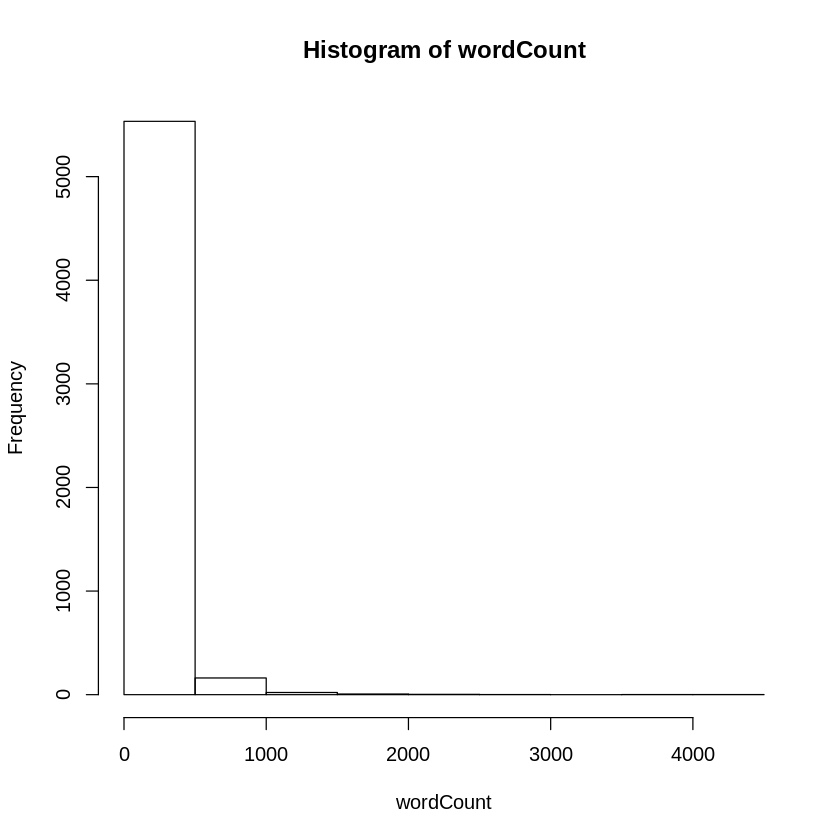

In [114]:
hist(wordCount)

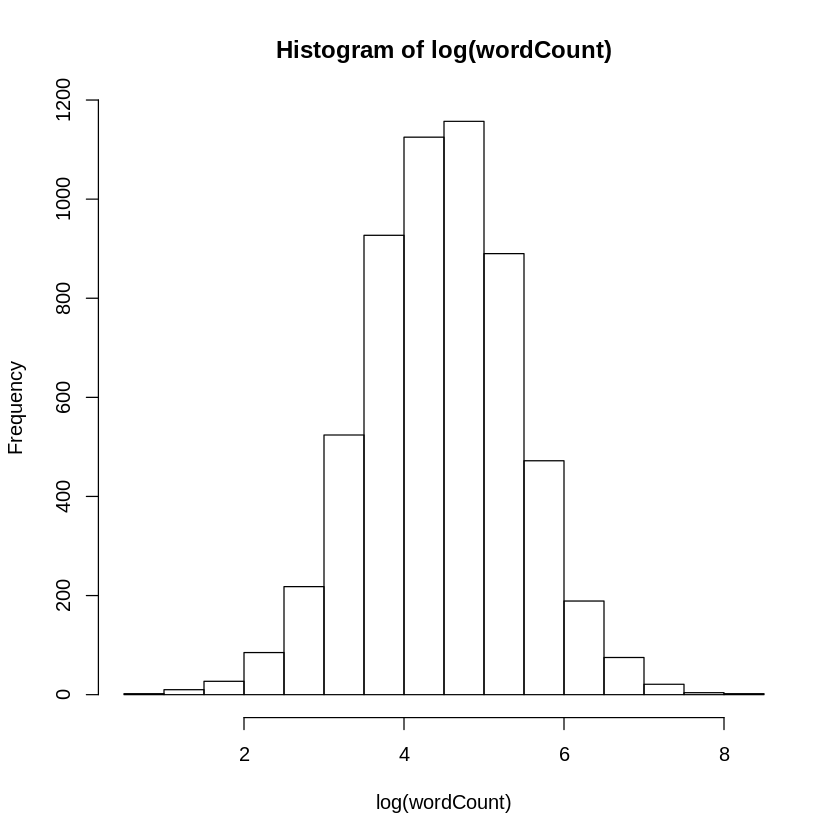

In [115]:
hist(log(wordCount))

In [116]:
emailsSparse$logWordCount = log(wordCount)

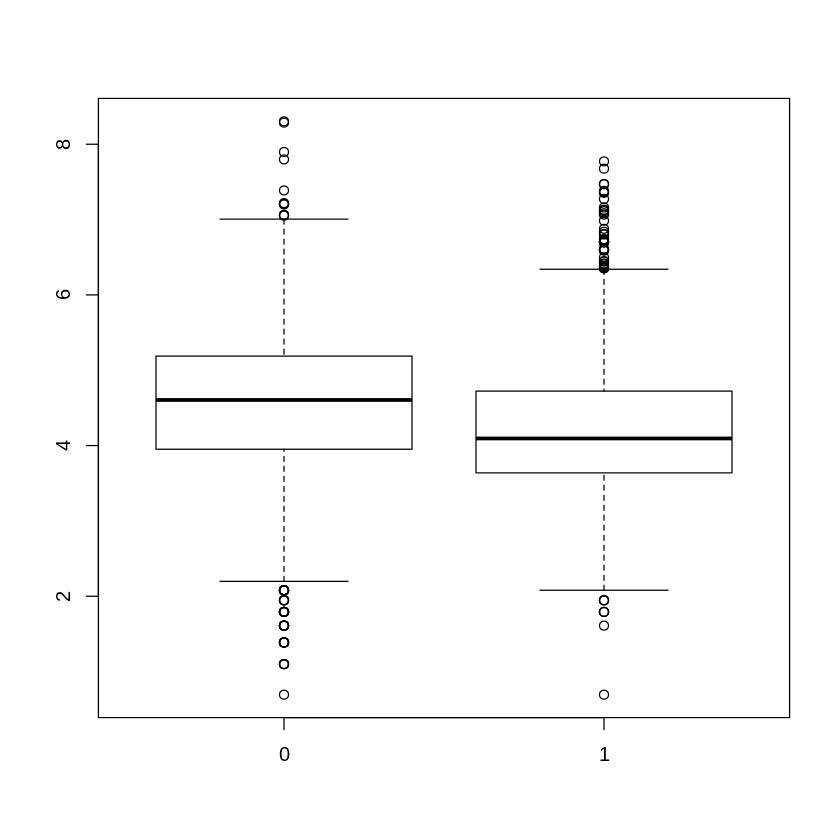

In [117]:
boxplot(logWordCount ~ spam, data = emailsSparse)

In [119]:
train2 = subset(emailsSparse, spl == TRUE)
test2 = subset(emailsSparse, spl == FALSE)

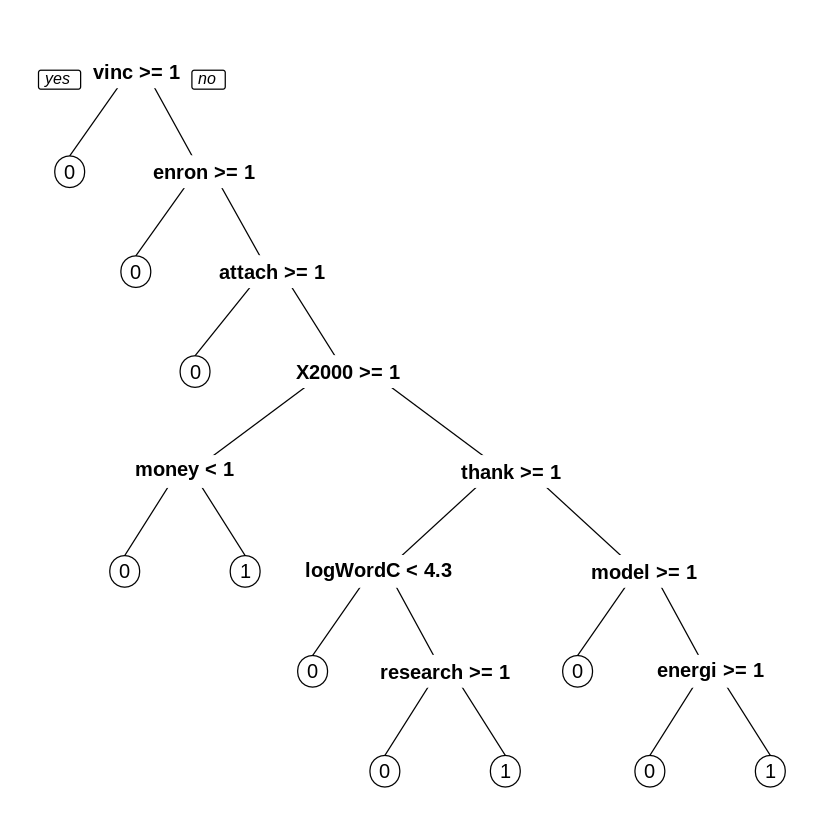

In [120]:
spam2CART = rpart(spam ~ . , data = train2)
prp(spam2CART)

In [126]:
set.seed(123)
spam2RF = randomForest(spam ~ ., data = train2)

In [123]:
predTestCART2 = predict(spam2CART, newdata = test2)
table(test2$spam , predTestCART2[,2]>= 0.5)

   
    FALSE TRUE
  0  1214   94
  1    26  384

In [124]:
accTestCART2 = (1214 + 384)/nrow(test2)
accTestCART2

[1] 0.9301513

In [125]:
ROCRpredTestCART2 = prediction(predTestCART[,2], test2$spam)
auc = as.numeric(performance(ROCRpredTestCART2, "auc")@y.values)
auc

[1] 0.963176

In [127]:
predTestRF2 = predict(spam2RF, newdata = test2)
table(test2$spam, predTestRF2)

   predTestRF2
       0    1
  0 1298   10
  1   27  383

In [128]:
accTestRF2 = (1298 + 383)/nrow(test2)
accTestRF2

[1] 0.9784633

In [161]:
predTestRFprob2 = predict(spam2RF, newdata = test2, type = "prob")
ROCRpredTestRF2 = prediction(predTestRFprob2[,2], test2$spam)
auc = as.numeric(performance(ROCRpredTestRF2, "auc")@y.values)
auc

[1] 0.998084